In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import numpy as np
import math
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy.linalg as la

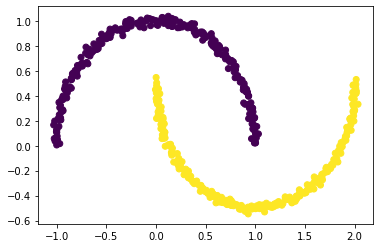

In [1]:
X, y = make_moons(n_samples = 500, noise = 0.02, random_state = 417)

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()


In [33]:
def rbf(x,y,gamma=15):
  exponent = gamma*np.linalg.norm(x-y)**2
  return np.exp(-exponent)
def polynomial(x,y,offset=1):
  d=x.shape[1]
  return (offset + np.dot(x, y)) ** d

In [34]:
def KernelMatrix(X,kernel="rbf"):
  M=X.shape[0]
  K=np.zeros((M,M))
  for i in range(M):
    for j in range(M):
      if kernel=="rbf":
        K[i][j]=rbf(X[i],X[j],gamma=15)
      else:
        K[i][j]=polynomial(X[i],X[j])
  return K       

In [35]:
def kernelPCA(X,Y,n_components=2):
  K=KernelMatrix(X)
  N = K.shape[0]
  one_n = np.ones((N,N)) / N
  K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)    
  eigvals, eigvecs = eigh(K)
  eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1] 
  X_pc = np.column_stack([eigvecs[:, i] for i in range(n_components)])    
  return X_pc

In [38]:
def normalPCA(X,Y,n_components=2):
  K=np.dot(X,X.T)
  N = K.shape[0]
  one_n = np.ones((N,N)) / N
  K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)    
  eigvals, eigvecs = eigh(K)
  eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1] 
  X_pc = np.column_stack([eigvecs[:, i] for i in range(n_components)])    
  return X_pc

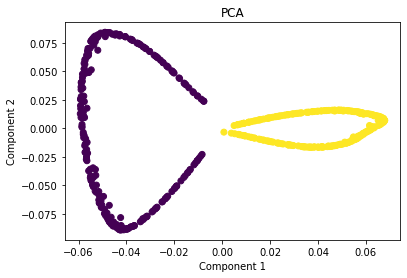

In [42]:
X_pca_kernel=kernelPCA(X,y,n_components=2)
plt.title("PCA")
plt.scatter(X_pca_kernel[:, 0],X_pca_kernel[:, 1], c = y)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

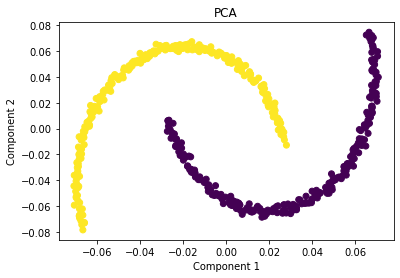

In [39]:
X_pca_kernel=normalPCA(X,y)
plt.title("PCA")
plt.scatter(X_pca_kernel[:, 0],X_pca_kernel[:, 1], c = y)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

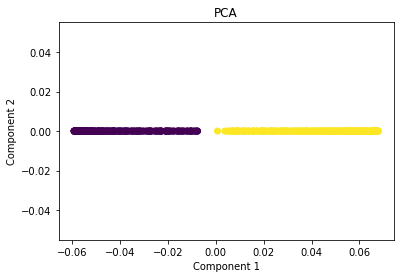

In [43]:
X_pca_kernel=kernelPCA(X,y,n_components=1)
plt.title("PCA")
plt.scatter(X_pca_kernel[:, 0],np.zeros(X_pca_kernel.shape[0]), c = y)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

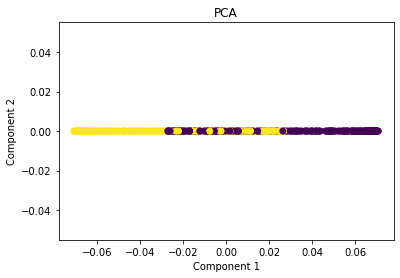

In [44]:
X_pca_kernel=normalPCA(X,y,n_components=1)
plt.title("PCA")
plt.scatter(X_pca_kernel[:, 0],np.zeros(X_pca_kernel.shape[0]), c = y)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [15]:
"""def PCA_(X_data, Y_data):

    X = X_data.T
    XXT = (X.T).dot(X)

    eigen_values, eigen_vectors = np.linalg.eig(XXT)
    lembda = np.count_nonzero(eigen_values, axis=0)

    #Energy in eigenvalue
    e = abs(eigen_values)
    e = -np.sort(-e)
    sum_egn = sum(e)#Sum of total eigenvalues
    a = 0
    count = 0
    for i in range (30):
        a += e[i]    
        count = count+1
        if a/sum_egn >= 0.95:
            break

    #print(count)

    #print("Percentage energy", a/sum_egn)

    #Stacking in significant eigen values
    pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
    pairs = sorted(pairs, key=lambda x: x[0], reverse=True)


    # Stacking wigenvalues and eigenvectors in decreasing order of significance 
    Sig_Eig = []
    n = lembda

    if n == 1:
        Sig_Eig = np.hstack((pairs[0][1].reshape(len(eigen_values),1))).real.reshape(-1,1)

    else:
        for i in range(n):
            W1 = np.hstack((pairs[i][1].reshape(len(eigen_values),1))).real.reshape(-1,1)
            #print(W1)
            Sig_Eig.append(W1)

    Sig_Eig = np.array(Sig_Eig).reshape(n,len(eigen_values)).T

    U = np.zeros((X.shape[0], 1))
    for i in range (lembda):
        k = Sig_Eig[i].reshape(-1,1)
        L = ((X).dot(k))/(math.sqrt(pairs[i][0]))
        if i == 0:
            U = L
        else:
            U = np.append(U, L, axis =1)

    tot_cls = np.count_nonzero(np.unique(Y_data, return_counts=False))
    if tot_cls == 2:
        c = 2
    else:
        c = lembda
    #c=2
    U = U[:, 0:c]

    X_pca = (X_data).dot(U)
    #print(X_pca.shape)
    return(X_pca)"""